In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from wordcloud import WordCloud

In [2]:
news = pd.read_csv("data.csv")

## EDA 

In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


#### Above describes, the dataset contains 4 attributes and 4009 number of rows 

In [4]:
news

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [5]:
# remove unnecessary attributes
news = news.drop(labels=['URLs', 'Headline'], axis=1)
# also rename attribues names
news.columns = ['text', 'label']

In [6]:
news

,text,label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,"Country singer Jason Aldean, who was performin...",1
...,...,...
4004,Trends to Watch\n% of readers think this story...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,NaN,0
4007,SHANGHAI (Reuters) - China said it plans to ac...,1


In [7]:
# rename 0 as Fake 1 as Real from label attribute
news['label'] = news['label'].map({1: 'Real', 0: 'Fake'})

In [8]:
news

,text,label
0,Image copyright Getty Images\nOn Sunday mornin...,Real
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",Real
2,The feud broke into public view last week when...,Real
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,Real
4,"Country singer Jason Aldean, who was performin...",Real
...,...,...
4004,Trends to Watch\n% of readers think this story...,Fake
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Fake
4006,NaN,Fake
4007,SHANGHAI (Reuters) - China said it plans to ac...,Real


In [9]:
# count null values if the dataset has it
news.isna().sum()

text     21
label     0
dtype: int64

#### Above shows that there 21 null values, which need to be fixed.

In [10]:
# remove null values from the dataset
news = news.dropna()

In [11]:
news.shape

(3988, 2)

#### After cleaning the dataset, the number of rows is 3988 and attribute is 2. 

In [12]:
news.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4003,False,False
4004,False,False
4005,False,False
4007,False,False


#### Confirming whether the dataset contains any null values or not. 

In [13]:
# save cleaned dataset
news.to_csv('cleaned_dataset.csv', index=False)

## Data Visualization 

In [14]:
news.groupby('label').describe().T


label                                                     Fake  \
text count                                                2120   
     unique                                               1193   
     top     A Potato Battery Can Light up a Room for Over ...   
     freq                                                  143   

label                                                     Real  
text count                                                1868  
     unique                                               1670  
     top     Chat with us in Facebook Messenger. Find out w...  
     freq                                                   61

#### Above describes, that 2120 rows are Fake and 1868 are Real news. However, only 1193 and 1670 are unique data in Fake and Real respectiviely. We can see 61 are frequently repeated news as Real and only 143 fake news are repeated. 

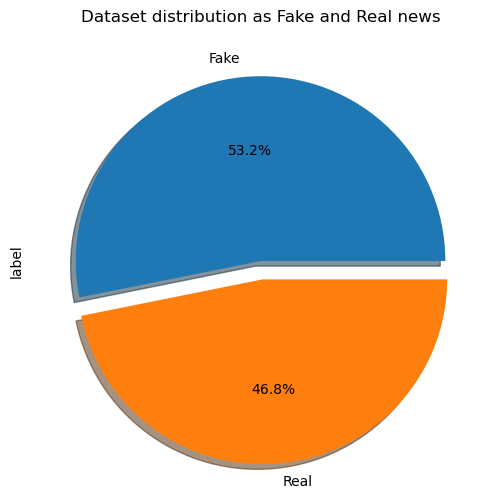

In [15]:

import matplotlib.pyplot as plt

news['label'].value_counts().plot(kind='pie', explode=[0,0.1], figsize=(6,6), autopct='%1.1f%%', shadow=True)
plt.title('Dataset distribution as Fake and Real news')
plt.show()

In [16]:
labelCount = news['label'].value_counts()

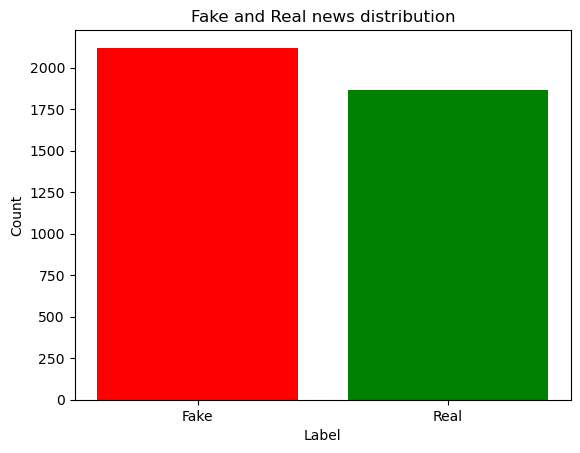

In [17]:
# Create a bar plot to visualize the label distribution
plt.bar(labelCount.index, labelCount.values, color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Fake and Real news distribution')
plt.show()

#### Above Pie-chart and Bar-graph exhibit that the dataset contains more fake news than real news. However, the distribution of both Fake and Real is eligible and acceptable for modeling and training. 

### Text pre-processing 

In [18]:
news['text'][2]

"The feud broke into public view last week when Mr. Corker said that Mr. Trump’s advisers were guarding against “chaos.” The president retaliated on Sunday by saying the retiring senator “didn’t have the guts to run” for another term. Mr. Corker responded on Twitter an hour later, saying that the White House had become an “adult day care center.”\nHe then unloaded in an interview with The New York Times, saying in public what many of his Republican colleagues say in private — that the president is dangerously erratic, treats his high office like “a reality show,” has to be contained by his staff and is reckless enough to put the country “on the path to World War III.”\nMr. Corker, a moderate by temperament as well as ideology, had measured his occasional criticisms of Mr. Trump for months in hopes of influencing his foreign policy, but evidently feels liberated now that he has decided not to run for a third term.\nFew other incumbent Republicans rushed to the microphones to echo his co

#### In above text, we can see the news text contains many stopswords and punctuations like the a, -, in, etc. Also, it contains the data in lower and upper cases.

#### Now, we are doing Stemming i.e reducing a word into its root word such as 'getting' into 'get', 'harder' into 'hard', etc.

In [19]:
ps = PorterStemmer()

In [20]:
# define a function for stemming
def stemming(text):
    
#     store only lower case a-z and upper case A-Z, ignoring other words/letters, finally convert into lowercase
    stemmedContent = re.sub('[^a-zA-Z]', ' ', text).lower()
#     split the word
    stemmedContent = stemmedContent.split()
    
#     check whether each stemmed data is stopword or not, if yes remove it and if no store it
    stemmedContent = [ps.stem(word) for word in stemmedContent if not word in stopwords.words('english')]
#     join stemmed data by a space
    stemmedContent = ' '.join(stemmedContent)
    return stemmedContent
    

In [21]:
# replace old text attribute's data by its stemming new data that stemmed by above function
news['text'] = news['text'].apply(stemming)

C:\Users\uSer\AppData\Local\Temp\ipykernel_4948\669869562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['text'] = news['text'].apply(stemming)


In [22]:
# reviewing the above row data
news['text'][2]

'feud broke public view last week mr corker said mr trump advis guard chao presid retali sunday say retir senat gut run anoth term mr corker respond twitter hour later say white hous becom adult day care center unload interview new york time say public mani republican colleagu say privat presid danger errat treat high offic like realiti show contain staff reckless enough put countri path world war iii mr corker moder tempera well ideolog measur occasion critic mr trump month hope influenc foreign polici evid feel liber decid run third term incumb republican rush microphon echo comment monday sever made littl attempt hide irrit mr trump attack mr corker import part team particularli import part budget debat floor next week mr mcconnel said pointedli event hazard ky scott pruitt head environment protect agenc bob corker leader congress issu divers deficit reduct combat terror man unwav integr senat rob portman republican ohio said statement go accomplish econom nation secur agenda go wor

#### Here we can see the punctuation and stopwords are eliminated from the text.

In [23]:
# extract the values of text and label and store
X = news['text'].values
y = news['label'].values

In [24]:
# vectorization  ==> converting textual data into numerical data
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [25]:
print(X)

  (0, 30099)	0.015859046393638016
  (0, 30020)	0.010344739578419837
  (0, 29841)	0.041455137962547225
  (0, 29782)	0.023431708798453892
  (0, 29755)	0.026453641370642555
  (0, 29617)	0.027803718858821665
  (0, 29467)	0.09282870452162262
  (0, 29375)	0.0219767007257197
  (0, 29360)	0.018077878232623214
  (0, 29227)	0.013776270211082223
  (0, 29138)	0.019187773586587947
  (0, 28994)	0.021952497767689556
  (0, 28773)	0.0251271664045315
  (0, 28722)	0.024800940202448173
  (0, 28673)	0.035384742274624216
  (0, 28610)	0.029873084428922787
  (0, 28458)	0.024350546835228158
  (0, 28444)	0.025097209681350856
  (0, 28371)	0.020004605417965816
  (0, 28305)	0.036793753726931035
  (0, 28259)	0.03712231138069502
  (0, 28250)	0.038664344829553964
  (0, 28222)	0.037841773413036336
  (0, 28174)	0.023494531216548497
  (0, 28151)	0.014716973311178045
  :	:
  (3987, 6318)	0.04441226291782957
  (3987, 6205)	0.02115317021363051
  (3987, 5836)	0.03887098498107889
  (3987, 5580)	0.0215785825569546
  (3987, 55

#### Now, we can see here, the text and label are vectorized successfully. 

## Modeling 

In [26]:
# split training and testing dataset into 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [27]:
# count the training set
X_train.shape

(3190, 30372)

### Apply Logistic Regression classifier


In [44]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
# on training set
train_y_prediction = model.predict(X_train)
# print and compare with training 
print('Train accuracy: ', accuracy_score(train_y_prediction, y_train))

Train accuracy:  0.9921630094043887


In [31]:
# on testing set
testing_y_prediction = model.predict(X_test)
print('Test accuracy',accuracy_score(testing_y_prediction,y_test))

Test accuracy 0.9674185463659147


### Confusion Matrix from Logistic Regression 

In [52]:
# make predictions on the test set
y_pred = model.predict(X_test)

In [53]:
# obtain the true labels from the test set
y_true = y_test

In [55]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_true, y_pred)

In [56]:
print(confusionMatrix)

[[405  19]
 [  7 367]]


### Above confusion matrix describes as follows:
#### 405 - True Negative (TN) - count of true negatives (correctly predicted negatives)
#### 19 - False Positive (FP) -count of false positives (incorrectly predicted positives)
#### 7 - False Negative (FN) - count of false negatives (incorrectly predicted negatives)
#### 367 - True Positive (TP) - count of true positives (correctly predicted positives)

### Apply Decision Tree Classifier

In [35]:

from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier()

In [37]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
# accuracy rate of DecisionTreeClassifier model on training set
dt.score(X_train,y_train)

1.0

### Apply Random Forest Classifier 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
modelRF = RandomForestClassifier(random_state = 0)

In [49]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
# accuracy rate of on training set
modelRF.score(X_train,y_train)

1.0

### Evaluation 

In [51]:
# manually testing by taking input from the user
def getResult(prediction):
    if(prediction[0] == 1):
        return 'Fake'
    else:
        return 'Real'
        
        
        
inputData = X_test[321]

predictLR = model.predict(inputData)
print("Prediction result from Logistic Regression is :", getResult(predictLR))


predictDT = dt.predict(inputData)
print("Prediction result from Decision Tree is :", getResult(predictDT))

predictRF = modelRF.predict(inputData)
print("Prediction result from Random Forest is :", getResult(predictRF))



Prediction result from Logistic Regression is : Real
Prediction result from Decision Tree is : Real
Prediction result from Random Forest is : Real
